# Mask R-CNN - Verificação do modelo treinado (Th/K)

Teste e uso do modelo treinado adaptado do [github matterport - Mask RCNN](https://github.com/matterport/Mask_RCNN)

In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


ROOT_DIR = os.path.abspath("../../")


sys.path.append(ROOT_DIR)  
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.anomaly import anomaly

%matplotlib inline 

MODEL_DIR = os.path.join(ROOT_DIR, "logs")

ANO_WEIGHTS_PATH = "C:/Users/Ricardo/Desktop/IC/Metodo1/razaoThK/Transfer/Mask_RCNN-master/mask_rcnn_anomaly_0035.h5"  # TODO: update this path

Using TensorFlow backend.


## Configurações

In [3]:
config = anomaly.CustomConfig()
ANO_DIR = "C:/Users/Ricardo/Desktop/IC/Metodo1/razaoThK/Transfer/Mask_RCNN-master/samples/anomaly/dataset"

Configurações, parâmetros e hiperparâmetros usados da MRCNN

In [4]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [5]:
DEVICE = "/gpu:0"  # variável para o uso da GPU

TEST_MODE = "inference" # inspecionar o modelo por inferência, a partir do treino não estava disponível ainda no momento da criação desse código

In [6]:
def get_ax(rows=1, cols=1, size=16):
    
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax    #matplotlib ax para criação das imagem para a sua visualização

## Load Validation Dataset

In [7]:
# Carregando dataset de validação
dataset = anomaly.CustomDataset()
dataset.load_custom(ANO_DIR, "val")

dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 15
Classes: ['BG', 'Anomaly']


## Load Model

Carregando o modelo treinado

In [8]:
# criando o modelo no modo de inferência
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


Carregando os pesos do modelo treinado

In [9]:
weights_path = ANO_WEIGHTS_PATH

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  C:/Users/Ricardo/Desktop/IC/Metodo1/razaoThK/Transfer/Mask_RCNN-master/mask_rcnn_anomaly_0035.h5








## Run Detection

Detecção do modelo para uma imagem qualquer do dataset de validação

image ID: Anomaly.0085.jpg (3) C:/Users/Ricardo/Desktop/IC/Metodo1/razaoThK/Transfer/Mask_RCNN-master/samples/anomaly/dataset\val\0085.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (14,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (14, 4)               min:   22.00000  max: 1021.00000  int32
gt_mask                  shape: (1024, 1024, 14)      min:    0.00000  max:    1.00000  bool


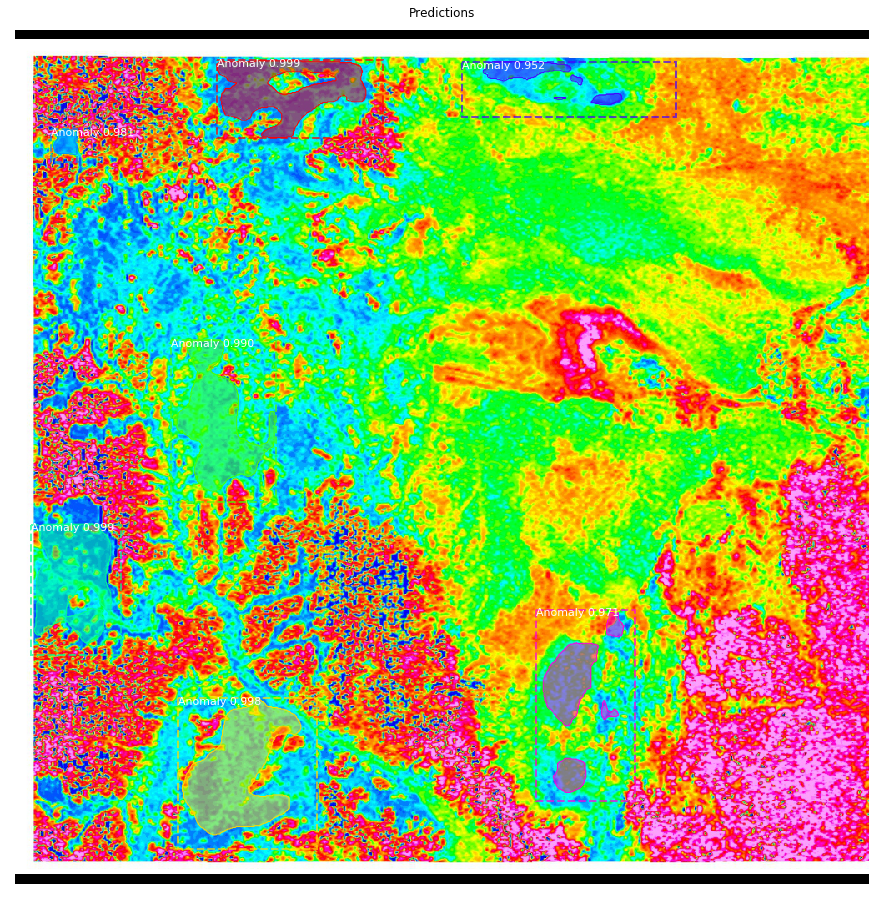

In [11]:
# obtem imagem aleatória do dataset de validação junto aos seus bb, mask, id de classe...
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# detector
results = model.detect([image], verbose=1)

# imprimir resultados
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

Detecção do modelo para imagem de razão Th/K do mapa da região da PAAF

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (14,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (14, 4)               min:    0.00000  max:  965.00000  int32
gt_mask                  shape: (1024, 1024, 14)      min:    0.00000  max:    1.00000  bool


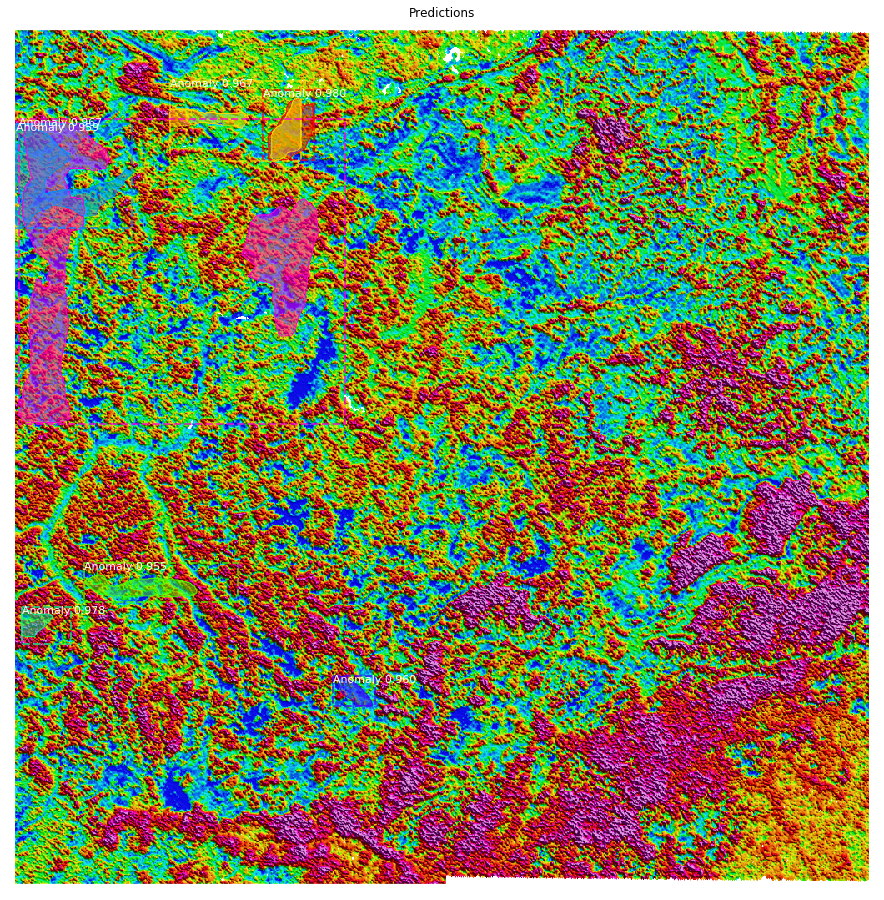

In [26]:
import cv2

# carregando mapa PAAF
mapa = cv2.imread('C:/Users/Ricardo/Desktop/deep learning arquivos mapa PAAF projeto/paf_gama_ThK.tif')
mapa = cv2.resize(mapa, (1024, 1024))
mapa = cv2.cvtColor(mapa, cv2.COLOR_BGR2RGB)

# detector
model.detect([mapa], verbose=1)

# imprimir resultados
ax = get_ax(1)
r = results[0]
visualize.display_instances(mapa, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

## Color Splash

Técnica usada para auxiliar na vizualização das regiões detectadas pelo modelo. Em cores é as regiões cujo o modelo acredita ser anomalia de Th/K e em tons de cinza para regiões sem anomalia.

Color Splash para a imagem, do dataset de validação, detectada acima pelo modelo.

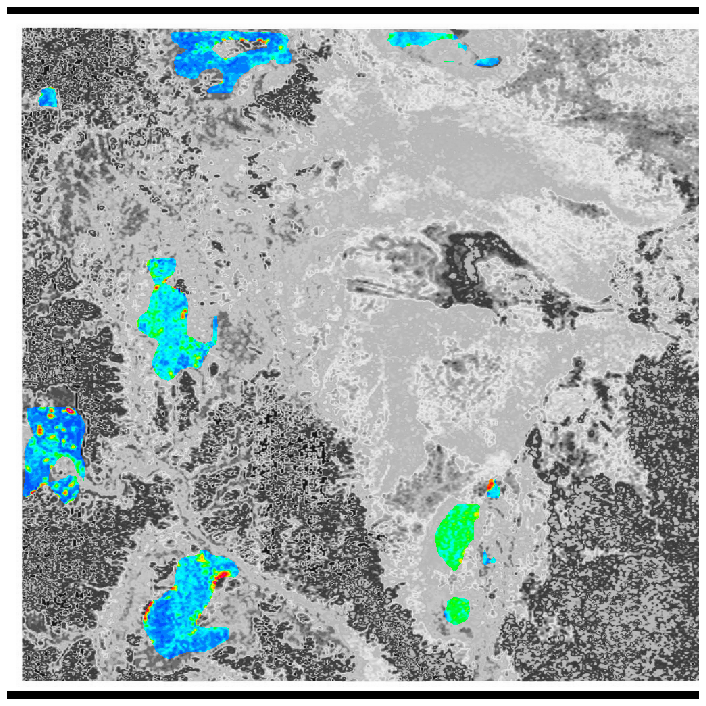

In [14]:
splash = anomaly.color_splash(image, r['masks'])
display_images([splash], cols=1)

Color Splash para o mapa da região da PAAF

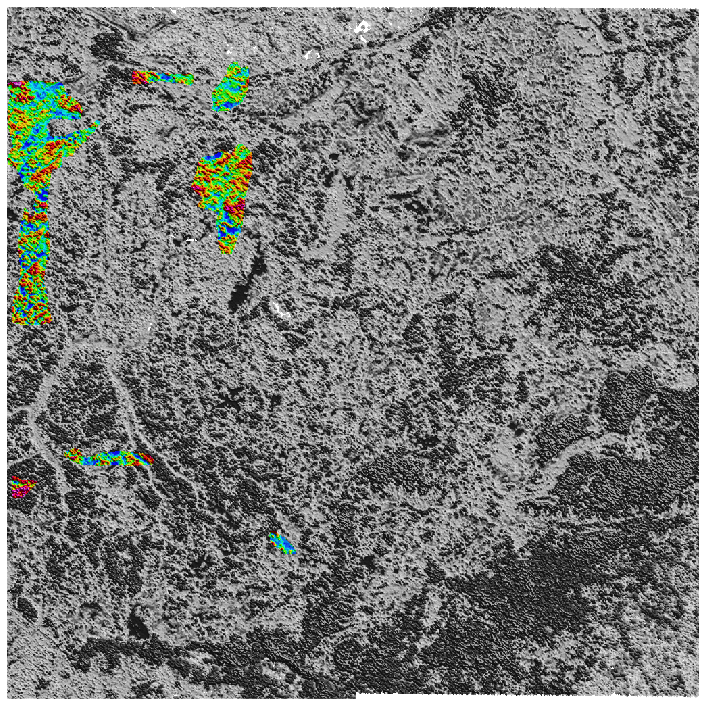

In [27]:
splash = anomaly.color_splash(mapa, r['masks'])
display_images([splash], cols=1)